In [1]:
import gym
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import maze
from dyna import dyna_q, dyna_q_plus

### Reproduction of Figure 8.5

In [2]:
env = gym.make('ShortcutMaze-v0')
env.seed(3); np.random.seed(3)
q0, policy0, history0 = dyna_q(env, n=50, num_episodes=400, alpha=0.5, gamma=0.95)

env = gym.make('ShortcutMaze-v0')
env.seed(3); np.random.seed(3)
q1, policy1, history1 = dyna_q_plus(env, n=50, num_episodes=400, alpha=0.5, gamma=0.95,
                                    kappa=5e-4, action_only=False)

In [3]:
def plot_learning(histories, labels):
    with matplotlib.rc_context({'figure.figsize': [10, 10]}):
        plt.plot([0, 1])
        plt.figure()
        plt.title(f"Cumulative Reward")
        plt.xlabel("Timesteps")
        plt.ylabel("Cumulative Reward")

        plt.xlim([0, 6_000])
        plt.ylim([0, 400])

        for history, label in zip(histories, labels):
            plt.plot(np.cumsum(history), label=label)

        plt.legend()
        plt.show()

def plot_results(env, q, policy, label):
    # Render example episode
    done, state = False, env.reset()
    env.render()
    while not done:
        action = np.random.choice(env.action_space.n, p=policy[state])
        state, reward, done, info = env.step(action)
        env.render()
    plt.title(f"Example Episode ({label})")

    env = env.unwrapped
    fig = plt.figure()
    ax = fig.gca()
    ax.set_title(f"Value Function and Policy ({label})")
    ax.set_xticks([])
    ax.set_yticks([])

    # Plot value function
    q = np.copy(q)
    unvisited = np.where(q == 0)
    q[unvisited] = -np.inf
    v = np.max(q, axis=1).reshape(env.observation_space.nvec)
    ax.imshow(v.T, origin='lower')

    # Plot actions of the policy
    a_stars = np.argmax(policy, axis=1)
    arrows = np.array([env.actions[a] for a in a_stars])
    arrows[unvisited[0], :] = 0
    arrows = arrows.reshape([*env.observation_space.nvec, 2])
    xr = np.arange(env.observation_space.nvec[0])
    yr = np.arange(env.observation_space.nvec[1])
    ax.quiver(xr, yr, arrows[:, :, 0].T, arrows[:, :, 1].T, pivot='mid', scale=20)

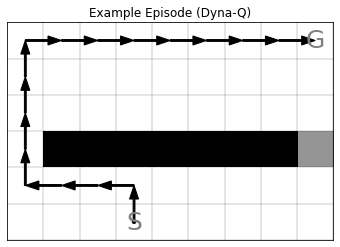

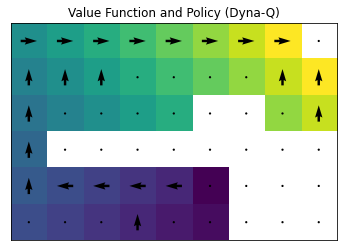

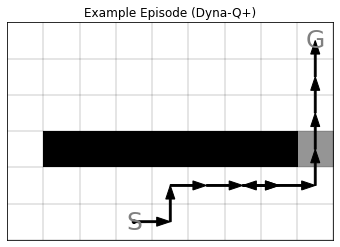

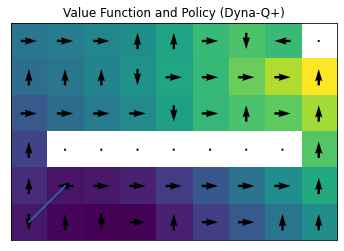

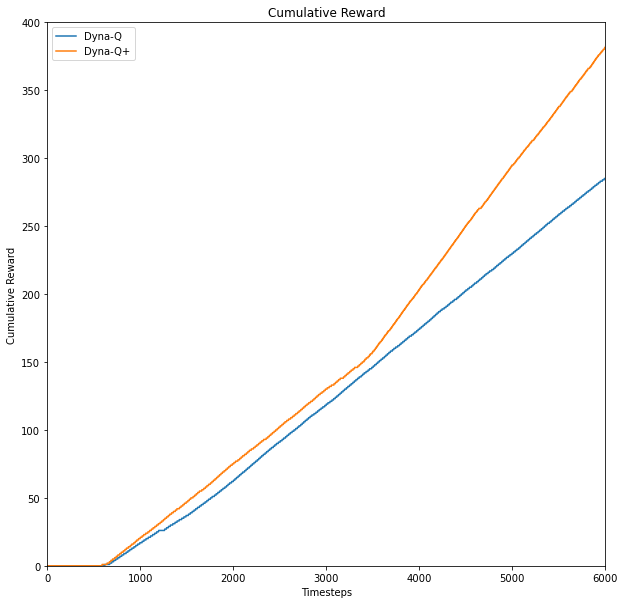

In [4]:
plot_results(env, q0, policy0, "Dyna-Q")
plot_results(env, q1, policy1, "Dyna-Q+")

plot_learning([history0, history1], ["Dyna-Q", "Dyna-Q+"])

### Benchmark of Dyna-Q+ with Action Only Exploration Bonus

In [5]:
env = gym.make('ShortcutMaze-v0')
env.seed(3); np.random.seed(3)
q2, policy2, history2 = dyna_q_plus(env, n=50, num_episodes=400, alpha=0.5, gamma=0.95,
                                    kappa=5e-4, action_only=True)

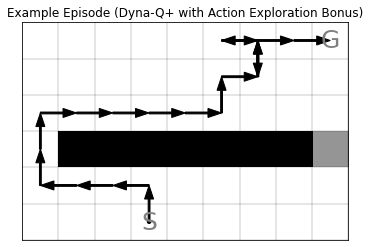

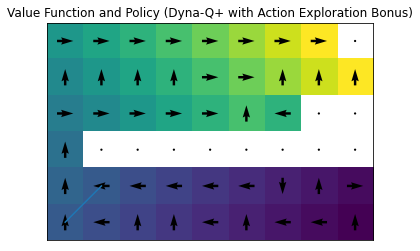

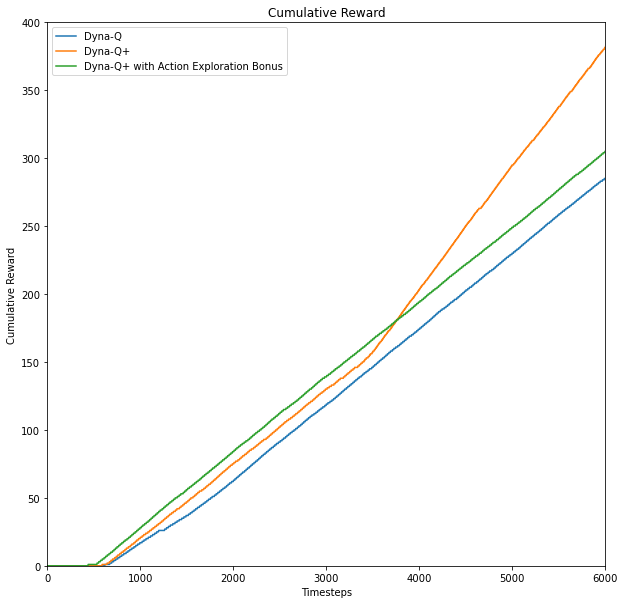

In [6]:
plot_results(env, q2, policy2, "Dyna-Q+ with Action Exploration Bonus")

plot_learning([history0, history1, history2],
              ["Dyna-Q", "Dyna-Q+", "Dyna-Q+ with Action Exploration Bonus"])